# 0.1 Webscraping process

To begin the project I gathered data from https://www.guitarguitar.co.uk/. Below is a screenshot of the Electric guitar page I used as a basis (https://www.guitarguitar.co.uk/guitars/electric/) to access each Electric Guitar's product page.



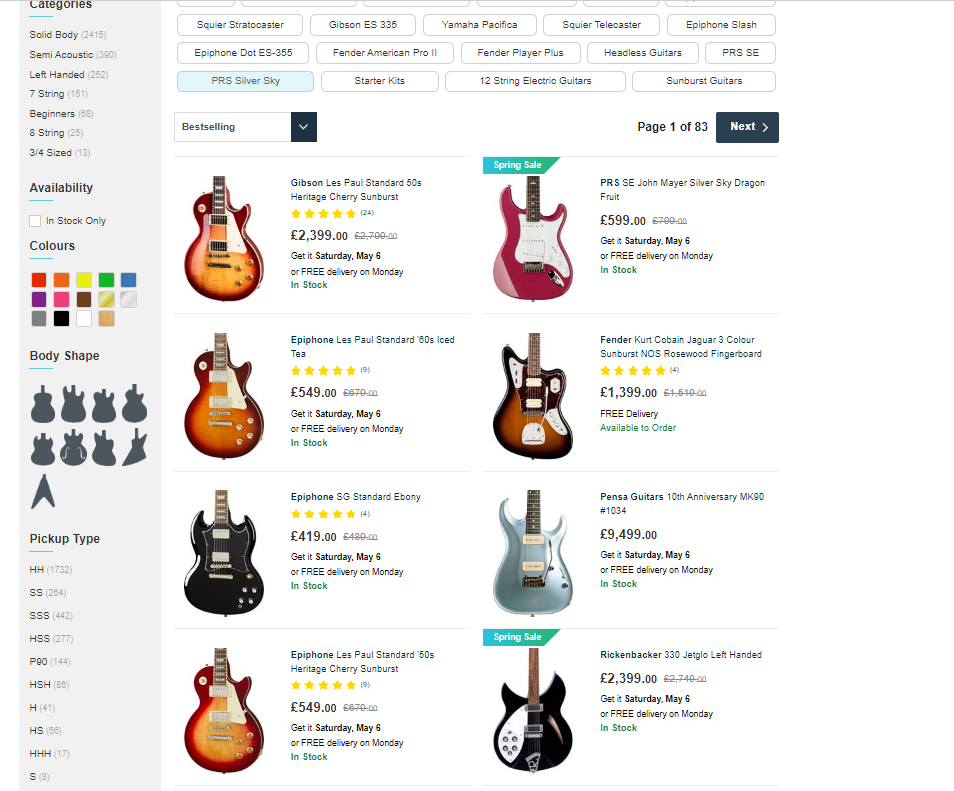

From there I then scraped the specs I wanted, mostly from tables like the one below before going back to the homepag and iterating the process. Once I reached the end of the homepage the script goes on to the next page and repeats the process. 

In this notebook I give an overview of that process. For just the webscraping script please see "0.2 Webscraping script".

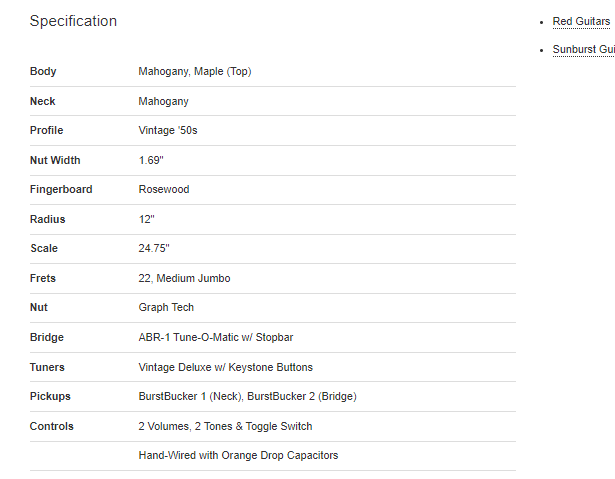

In [ ]:
## Import libraries

from bs4 import BeautifulSoup  ## BeautifulSoup library for scraping from the bs4 package
import requests ## Establish website connection using the requests library
import pandas as pd ## Use dataframes

In [ ]:
## Create a request to connect to the website

site = 'https://www.guitarguitar.co.uk/guitars/electric/'
resp = requests.get(site, 'html.parser')  ##html parser is default 

In [ ]:
## Check response

resp.status_code

200

In [ ]:
## Initialise the BeautifulSoup
## Takes two arguments
## 1. The response generated from our connection request, with its associated format -- we use .txt so 'response.txt'
## 2. The associated parser for reading the data. We're typically parsing HTML websites, so we use the default -- 'html.parser'
soup = BeautifulSoup(resp.text, 'html.parser')

In [ ]:
## Examine HTML 
soup

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Google Tag Manager -->
<script>
        (function (w, d, s, l, i) {
            w[l] = w[l] || []; w[l].push({
                'gtm.start':
                    new Date().getTime(), event: 'gtm.js'
            }); var f = d.getElementsByTagName(s)[0],
                j = d.createElement(s), dl = l != 'dataLayer' ? '&l=' + l : ''; j.async = true; j.src =
                    'https://www.googletagmanager.com/gtm.js?id=' + i + dl; f.parentNode.insertBefore(j, f);
        })(window, document, 'script', 'dataLayer', 'GTM-P8SKP3V');</script>
<!-- End Google Tag Manager -->
<meta content="UTF-8" name="charset"/>
<title>Electric Guitars | guitarguitar</title>
<meta content="Electric Guitars | guitarguitar" name="title"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type">
<meta content="telephone=no" name="format-detection"/>
<link href="https://i

In [ ]:
## Get all product pages (from product class tag) and hyperlink them

for x in soup.find('div', class_="products").findAll('a'):
  site = 'https://www.guitarguitar.co.uk' + x.get('href')
  print(site)

https://www.guitarguitar.co.uk/product/190319340844008--gibson-les-paul-standard-50s-heritage-cherry-sunburst
https://www.guitarguitar.co.uk/product/211214378330025--prs-se-john-mayer-silver-sky-dragon-fruit
https://www.guitarguitar.co.uk/product/191216352617008--epiphone-les-paul-standard-60s-iced-tea
https://www.guitarguitar.co.uk/product/13122413470032--fender-kurt-cobain-jaguar-3-colour-sunburst-nos-rosewood-fingerb
https://www.guitarguitar.co.uk/product/191216352625008--epiphone-sg-standard-ebony
https://www.guitarguitar.co.uk/product/221021395334003-8898932--pensa-guitars-10th-anniversary-mk90-1034
https://www.guitarguitar.co.uk/product/191216352615008--epiphone-les-paul-standard-50s-heritage-cherry-sunburst
https://www.guitarguitar.co.uk/product/12111215451332--rickenbacker-330-jetglo-left-handed
https://www.guitarguitar.co.uk/product/180430326801008--fender-player-stratocaster-polar-white-maple-fingerboard
https://www.guitarguitar.co.uk/product/191216352621008--epiphone-les-pau

In [ ]:
## testing -- get price

site = 'https://www.guitarguitar.co.uk/product/190319340844008--gibson-les-paul-standard-50s-heritage-cherry-sunburst'
resp = requests.get(site)
soup = BeautifulSoup(resp.text)

price = soup.find('p', class_='product-price no-savings').text
price

'£2,399.00'

In [ ]:
## testing -- scrape rating
rating = soup.find('div', class_='product-reviews-heading').find('h4').find('strong').text
print(rating)

4.9/5


In [ ]:
## scrape specs
specs = [ x.text for x in soup.findAll('td')]
specs

['Body',
 'Mahogany, Maple (Top)',
 'Neck',
 'Mahogany',
 'Profile',
 "Vintage '50s",
 'Nut Width',
 '1.69"',
 'Fingerboard',
 'Rosewood',
 'Radius',
 '12"',
 'Scale',
 '24.75"',
 'Frets',
 '22, Medium Jumbo',
 'Nut',
 'Graph Tech',
 'Bridge',
 'ABR-1 Tune-O-Matic w/ Stopbar',
 'Tuners',
 'Vintage Deluxe w/ Keystone Buttons',
 'Pickups',
 'BurstBucker 1 (Neck), BurstBucker 2 (Bridge)',
 'Controls',
 '2 Volumes, 2 Tones & Toggle Switch',
 '\xa0',
 'Hand-Wired with Orange Drop Capacitors']

In [ ]:
## Testing Manufacturer's ID:
id = soup.find('div', class_='description-full').find('p').find('strong').text
print(id)

Manufacturer's ID: LPS500HSNH1


In [ ]:
## Testing Manufacturer - brand embedded in the a href of the second <li class="breadcrumb-item"> element
brand = soup.find('ol', class_='breadcrumb').findAll('li')
print(brand)

[<li class="breadcrumb-item">
<a href="/">Home</a>
<svg class="breadcrumb-icon font-icon"><use xlink:href="#fa-angle-right"></use></svg>
</li>, <li class="breadcrumb-item">
<a href="/gibson/">Gibson</a>
<svg class="breadcrumb-icon font-icon"><use xlink:href="#fa-angle-right"></use></svg>
</li>, <li class="breadcrumb-item">
<a href="/gibson/guitars/" title="Gibson Guitars">Guitars</a>
<svg class="breadcrumb-icon font-icon"><use xlink:href="#fa-angle-right"></use></svg>
</li>, <li class="breadcrumb-item">
<a href="/gibson/guitars/electric/" title="Gibson Electric Guitars">Electric Guitars</a>
<svg class="breadcrumb-icon font-icon"><use xlink:href="#fa-angle-right"></use></svg>
</li>, <li class="breadcrumb-item">
<a href="/gibson/guitars/electric/solid-body/" title="Gibson Solid Body Electric Guitars">Solid Body Electric Guitars</a>
</li>]


In [ ]:
## Iterate over to extract brand 
for x in brand:
  print(x.find('a').text)

Home
Gibson
Guitars
Electric Guitars
Solid Body Electric Guitars


In [ ]:
## Extract brand element
brand = [x.find('a').text for x in brand]
brand = brand[1]
brand

'Gibson'

Now I have been able to access the pages and specs I want it's time to formulate how this will be brought together. For each Guitar I think it is best to extract the names/titles of specifications and assign them as keys in a dictionary with the spec values as the corresponding dictionary values.

Here is how this is done for one product - this will be implemented into webscraping script so each product has it's own dictionary and a list of the dictionaries is created.



In [ ]:
## put into dictionary (1st entry is feature key, 2nd is value and so on) 

## Get name and price value
name = soup.find('h1').text
price = soup.find('p', class_='product-price no-savings').text

## Create empty dict
guitar_dict = {}

## Name, Price k-v pairs
guitar_dict['name'] = soup.find('h1').text
guitar_dict['price'] = soup.find('p', class_='product-price no-savings').text

## Get remaining k-v pairs from specs list
for i in range(0, len(specs), 2):
    key = specs[i]
    value = specs[i+1]
    guitar_dict[key] = value

print(guitar_dict)

{'name': 'Gibson Les Paul Standard 50s Heritage Cherry Sunburst', 'price': '£2,399.00', 'Body': 'Mahogany, Maple (Top)', 'Neck': 'Mahogany', 'Profile': "Vintage '50s", 'Nut Width': '1.69"', 'Fingerboard': 'Rosewood', 'Radius': '12"', 'Scale': '24.75"', 'Frets': '22, Medium Jumbo', 'Nut': 'Graph Tech', 'Bridge': 'ABR-1 Tune-O-Matic w/ Stopbar', 'Tuners': 'Vintage Deluxe w/ Keystone Buttons', 'Pickups': 'BurstBucker 1 (Neck), BurstBucker 2 (Bridge)', 'Controls': '2 Volumes, 2 Tones & Toggle Switch', '\xa0': 'Hand-Wired with Orange Drop Capacitors'}


Everything is now combined into one scraping script:

In [ ]:
## Combine to scrape data - each unique product link and the releavnt features fro each page

k=1 ## Read the initial page of guitars
site = f'https://www.guitarguitar.co.uk/guitars/electric/page-{k}/'
resp = requests.get(site)
soup = BeautifulSoup(resp.text)

dic_list = []

print(resp)

while k < 82: ## Capture all 81 pages
  site = f'https://www.guitarguitar.co.uk/guitars/electric/page-{k}/'
  resp = requests.get(site)
  soup = BeautifulSoup(resp.text)
  print(site)

  ## Loop products tags to get link for each product page on home page
  for x in soup.find('div', class_="products").findAll('a'):
    ## hyperlink them
    site = 'https://www.guitarguitar.co.uk' + x.get('href')
    
    ## Access product page to scrape
    resp = requests.get(site)
    soup = BeautifulSoup(resp.text)


    ## Brand embedded in the a href of the second <li class="breadcrumb-item"> element - must iterate over all to extract brand
    brand = soup.find('ol', class_='breadcrumb').findAll('li')

    ## Map iteration to a list and extract just the brand element    
    brand = [x.find('a').text for x in brand]
    brand = brand[1]

    ## Get model info
    model = soup.find('h1').text
    
    ## Not every product has a user rating or id so try-except branches used
    try:
      rating = soup.find('div', class_='product-reviews-heading').find('h4').find('strong').text
    except AttributeError:
       rating = None

    try:
      id = soup.find('div', class_='description-full').find('p').find('strong').text
    except AttributeError:
       id = None

    ## If price is discounted class_='product-price no-savings' will not exist and we will have to use a savings class
    try:
        guitar_dict['price'] = soup.find('p', class_='product-price no-savings').text
    except AttributeError:
        guitar_dict['price'] = soup.find('p', class_='product-price has-savings').text

    ## Create empty dict
    guitar_dict = {}

  
    ## Add our global variables (some may be None-type due to try-except branches)
    guitar_dict['brand'] = brand
    guitar_dict['model'] = model
    guitar_dict['link'] = site
    guitar_dict['rating'] = rating
    guitar_dict['id'] = id
    
    ## Scrape remaining specs from table
    specs = [x.text for x in soup.findAll('td')]

    # Add k-v pairs from specs list to dict
    for i in range(0, len(specs), 2):
        key = specs[i]
        ## IndexError occurred for some entries so this branch was needed
        try:
          value = specs[i+1]
        except IndexError:
          value = None
        guitar_dict[key] = value

    ## Add dictionary to dic list
    dic_list.append(guitar_dict)

  ## Move to next homepage to repeat
  k+=1

<Response [200]>
https://www.guitarguitar.co.uk/guitars/electric/page-1/
https://www.guitarguitar.co.uk/guitars/electric/page-2/
https://www.guitarguitar.co.uk/guitars/electric/page-3/
https://www.guitarguitar.co.uk/guitars/electric/page-4/
https://www.guitarguitar.co.uk/guitars/electric/page-5/
https://www.guitarguitar.co.uk/guitars/electric/page-6/
https://www.guitarguitar.co.uk/guitars/electric/page-7/
https://www.guitarguitar.co.uk/guitars/electric/page-8/
https://www.guitarguitar.co.uk/guitars/electric/page-9/
https://www.guitarguitar.co.uk/guitars/electric/page-10/
https://www.guitarguitar.co.uk/guitars/electric/page-11/
https://www.guitarguitar.co.uk/guitars/electric/page-12/
https://www.guitarguitar.co.uk/guitars/electric/page-13/
https://www.guitarguitar.co.uk/guitars/electric/page-14/
https://www.guitarguitar.co.uk/guitars/electric/page-15/
https://www.guitarguitar.co.uk/guitars/electric/page-16/
https://www.guitarguitar.co.uk/guitars/electric/page-17/
https://www.guitarguita

In [ ]:
## Check length is 3211 - this was number of product pages on the website 
len(dic_list)

3211

In [ ]:
## Eyecheck list of dictionaries - looks good
print(dic_list)

[{'brand': 'Gibson', 'model': 'Gibson Les Paul Standard 50s Heritage Cherry Sunburst', 'link': 'https://www.guitarguitar.co.uk/product/190319340844008--gibson-les-paul-standard-50s-heritage-cherry-sunburst', 'rating': '4.9/5', 'id': "Manufacturer's ID: LPS500HSNH1", 'Body': 'Mahogany, Maple (Top)', 'Neck': 'Mahogany', 'Profile': "Vintage '50s", 'Nut Width': '1.69"', 'Fingerboard': 'Rosewood', 'Radius': '12"', 'Scale': '24.75"', 'Frets': '22, Medium Jumbo', 'Nut': 'Graph Tech', 'Bridge': 'ABR-1 Tune-O-Matic w/ Stopbar', 'Tuners': 'Vintage Deluxe w/ Keystone Buttons', 'Pickups': 'BurstBucker 1 (Neck), BurstBucker 2 (Bridge)', 'Controls': '2 Volumes, 2 Tones & Toggle Switch', '\xa0': 'Hand-Wired with Orange Drop Capacitors', 'price': '£599.00'}, {'brand': 'PRS', 'model': 'PRS SE John Mayer Silver Sky Dragon Fruit', 'link': 'https://www.guitarguitar.co.uk/product/211214378330025--prs-se-john-mayer-silver-sky-dragon-fruit', 'rating': None, 'id': "Manufacturer's ID: SEJ2R1J", 'Body': 'Poplar

Now all that is left to do is create the concatenated DataFrame and extract it as a CSV file.

In [ ]:
## Make a df from each dictionary and concat them all together 

## Convert each dictionary into a df
dfs = []
for d in dic_list:
    df = pd.DataFrame.from_dict(d, orient='index').T
    dfs.append(df)

## Concatenate all the DataFrames into a single DataFrame
guitar_df = pd.concat(dfs, ignore_index=True)

## Quick eyecheck of resulting DataFrame
guitar_df.tail(20)

,brand,model,link,rating,id,Body,Neck,Profile,Nut Width,Fingerboard,...,Bass Pickup,"2 Volumes, 2 Push/Pull Tone Controls, 3-way Toggle Switch",PRS Two-Piece Stoptail Hybrid Hardware,Phase III Vintage Tuners with Faux Bone Buttons,Top Material\t,Back & Sides\t,Neck Material\t,Saddle\t,Electronics\t,Tuners
3191,Gibson,Gibson ES-335 Dot Blues Burst (Pre-Owned),https://www.guitarguitar.co.uk/product/px23021...,None,None,3-Ply Maple/Poplar/Maple,Maple,NaN,"1.687""",Rosewood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3192,Gibson,Gibson 2015 L5 CES Natural Flame Custom Shop C...,https://www.guitarguitar.co.uk/product/pxp2212...,None,None,Solid Carved Spruce,Maple,NaN,"Nut-Width ~ 1-11/16""\r\n",Ebony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3193,Gibson,Gibson 2004 ES-335 Dot Figured Cherry (Pre-Own...,https://www.guitarguitar.co.uk/product/pxp2302...,None,None,3 Ply AAA Figured Maple/Poplar/Maple,Mahogany,NaN,"1.7""",Rosewood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3194,Gibson,Gibson ES-335 Figured Antique Natural #215920239,https://www.guitarguitar.co.uk/product/1912163...,5/5,Manufacturer's ID: ES35F00ANNH1,3 Ply AAA Figured Maple/Poplar/Maple,Mahogany,NaN,"1.7""",Rosewood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,Gibson,Gibson ES-335 Figured Antique Natural #222420197,https://www.guitarguitar.co.uk/product/1912163...,5/5,Manufacturer's ID: ES35F00ANNH1,3 Ply AAA Figured Maple/Poplar/Maple,Mahogany,NaN,"1.7""",Rosewood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3196,Gibson,Gibson ES-335 Figured Antique Natural #222420213,https://www.guitarguitar.co.uk/product/1912163...,5/5,Manufacturer's ID: ES35F00ANNH1,3 Ply AAA Figured Maple/Poplar/Maple,Mahogany,NaN,"1.7""",Rosewood,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3197,Fender,Fender Made in Japan Traditional II 70s Teleca...,https://www.guitarguitar.co.uk/product/2303014...,None,Manufacturer's ID: 5360502321,Ash,Maple,NaN,"1.615"" (41.02mm)\r\n",Maple,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3198,Fender Custom Shop,Fender Custom Shop Vintage Custom 1968 Telecas...,https://www.guitarguitar.co.uk/product/1912023...,None,Manufacturer's ID: 9235001176,2-Piece Select Mahogany,Maple,NaN,"1.650""",Round-Lam Maple,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3199,Fender Custom Shop,Fender Custom Shop Artisan Stratocaster Thinli...,https://www.guitarguitar.co.uk/product/2012183...,None,Manufacturer's ID: 9235001196,Roasted Ash with AAAA Figured Maple Burl Top,AAA Roasted Birdseye Maple,NaN,"1.650""",Round-Laminated Ebony,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3200,Fender Custom Shop,Fender Custom Shop Artisan Dual P90 Koa Strato...,https://www.guitarguitar.co.uk/product/2111163...,None,Manufacturer's ID: 9235001552,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Check dimensions - large amount of columns will need to be explored
guitar_df.shape

(3211, 571)

In [ ]:
## Export as CSV
guitar_df.to_csv('guitars.csv', index=False)